# Example: Exploration of Training and Evaluation Histories

This notebook is an example of how to use the outputs of training and prediction/evaluation phases. 

-------

In [1]:
# All imports
import os, re, pickle
import matplotlib.pyplot as plt
from IPython.display import Image
import matplotlib.image as mpimg
from collections import Counter
import pandas as pd 

# Training phase

In [2]:
# All histories are in the experiments directory
exp_path = '../experiments/'

# Get all training history files in the experiments directory
# NB! Might have subdirectories
train_history_files = []
for path, subdirs, files in os.walk(exp_path):
    for file in files:
        if file.endswith('.pickle') and not 'eval' in file:
            train_history_files.append(os.path.join(path, file))

print(*train_history_files, sep='\n')

../experiments/train_DBwise/split18_history.pickle
../experiments/train_DBwise/split11_history.pickle
../experiments/train_DBwise/split2_history.pickle
../experiments/train_smoke/train_smoke_history.pickle
../experiments/train_stratified/split2_2_history.pickle
../experiments/train_stratified/split0_3_history.pickle
../experiments/train_stratified/split0_2_history.pickle
../experiments/train_stratified/split2_1_history.pickle
../experiments/train_stratified/split3_1_history.pickle
../experiments/train_stratified/split1_3_history.pickle
../experiments/train_stratified/split1_2_history.pickle
../experiments/train_stratified/split0_0_history.pickle
../experiments/train_stratified/split2_3_history.pickle
../experiments/train_stratified/split4_0_history.pickle
../experiments/train_stratified/split0_1_history.pickle
../experiments/train_stratified/split1_1_history.pickle


Let's focus on two history of database-wise training with the whole Physionet2021 data, `split0_history` and `split1_history` in the `train_DBwise` directory. Both were trained in 50 epochs and used batch size of 64. Difference between these two splits can be found from the training and validation split as follows:

`split0.yaml`
```
train_file: PTB_PTBXL_INCART_G12EC.csv
val_file: ChapmanShaoxing_Ningbo.csv
```

`split1.yaml`
```
train_file: PTB_PTBXL_INCART_ChapmanShaoxing_Ningbo.csv
val_file: G12EC.csv
```

So the model trained based on `split0.yaml` had Chapman-Shaxing and Ningbo databases (CSN) as validation set and the model based on `split1` had the Georgia database (G12EC) as such. These two databases varies quite a lot from each other. 

Referring to the [Exploration of the PhysioNet2021 Data](exploration_physionet2021_data.ipynb), G12EC contains over 10,000 ECGs and CSN over 45,000 ECGs. In G12EC, 67 different diagnoses are labeled but in CSN, the number of labeled diagnoses is 94.

Labels which were used in the training and the number of each label in the whole mentioned database were the followings (numbers can be found [here](https://github.com/physionetchallenges/evaluation-2021/blob/main/dx_mapping_scored.csv)):

| DX | SNOMED CT Code | G12EC | CS | N |
|----|----------------|-------|----|---|
sinus rhythm|426783006|1752 |	1826 |	6299 |
|sinus bradycardia|426177001|1677 |	3889 |	12670|
|t wave abnormal|164934002|2306 |	1876 |	5167|
|sinus tachycardia|427084000|1261 |	1568 |	5687|
|atrial flutter|164890007|186 |	445 |	7615|
|left axis deviation|39732003|940| 	382 	|1163|
|atrial fibrillation|164889003|570 |	1780 |	0|
|t wave inversion|59931005|812 |	157 |	2720|
|sinus arrhythmia|427393009|455 |	0 |	2550|
|1st degree av block|270492004|769 |	247 |	893|



------------

Let's load the histories of these splits.

In [6]:
# From which directory train history is wanted
wanted = 'train_stratified'
wanted_train_history = sorted([file for file in train_history_files if wanted in file])

# --------------------------------------------#

# Load history or multiple
train_histories = []
for path in wanted_train_history:
    with open(path, 'rb') as history_file:
        while True:
            try:
                train_histories.append([history_file.name, pickle.load(history_file)])
            except EOFError:
                break

We might want to plot the metrics to see the development of the performance.

Plots of split0_0_history


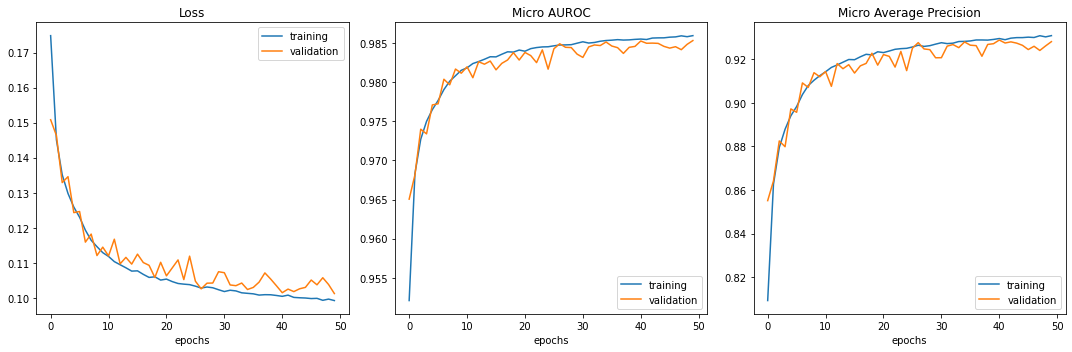

Plots of split0_1_history


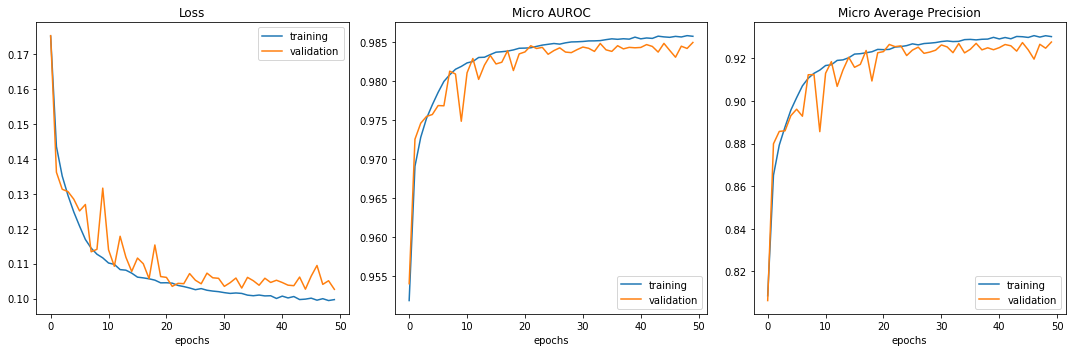

Plots of split0_2_history


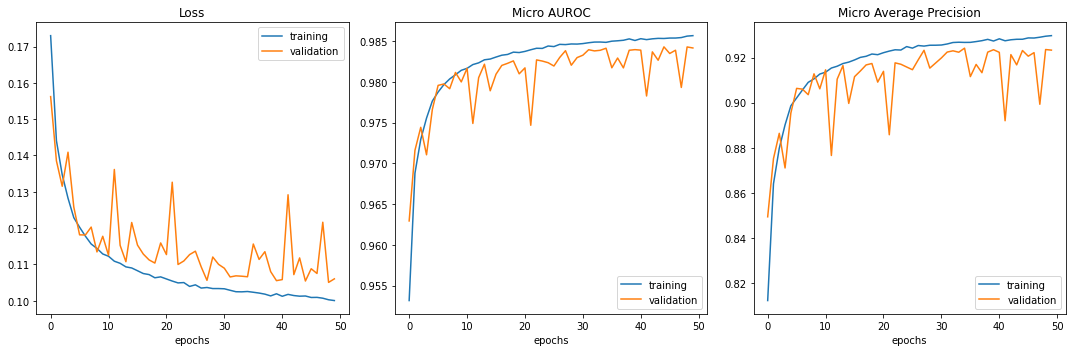

Plots of split0_3_history


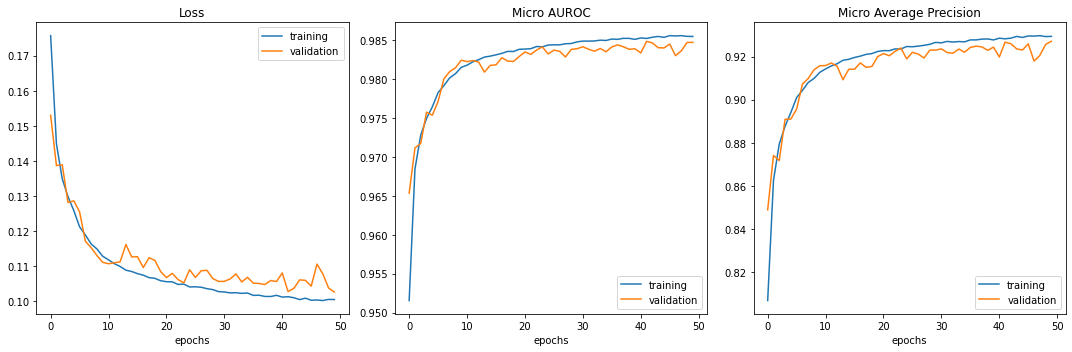

Plots of split1_1_history


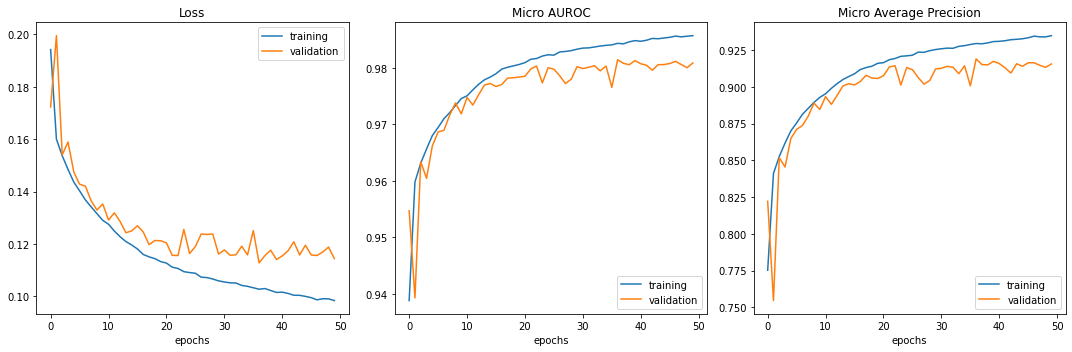

Plots of split1_2_history


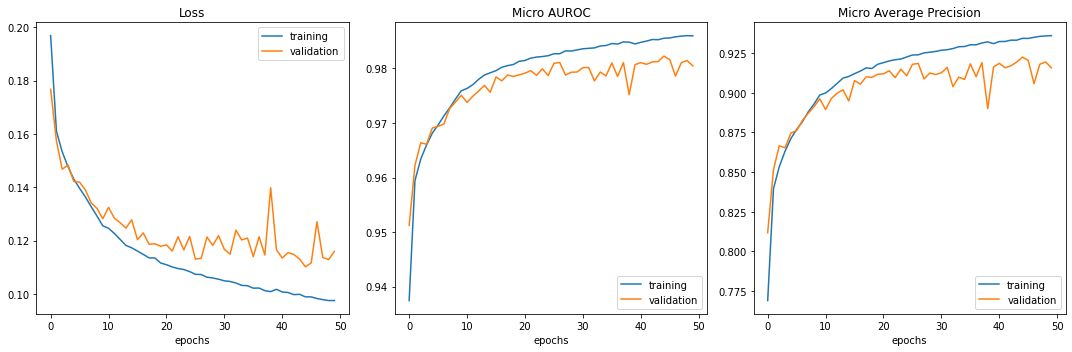

Plots of split1_3_history


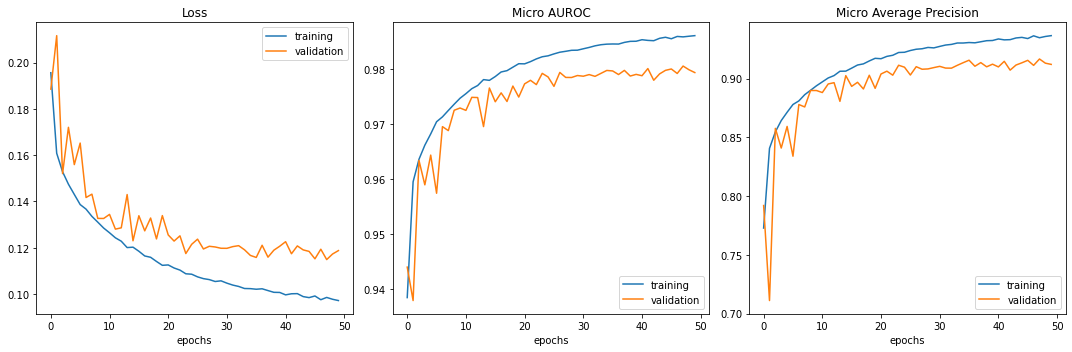

Plots of split2_1_history


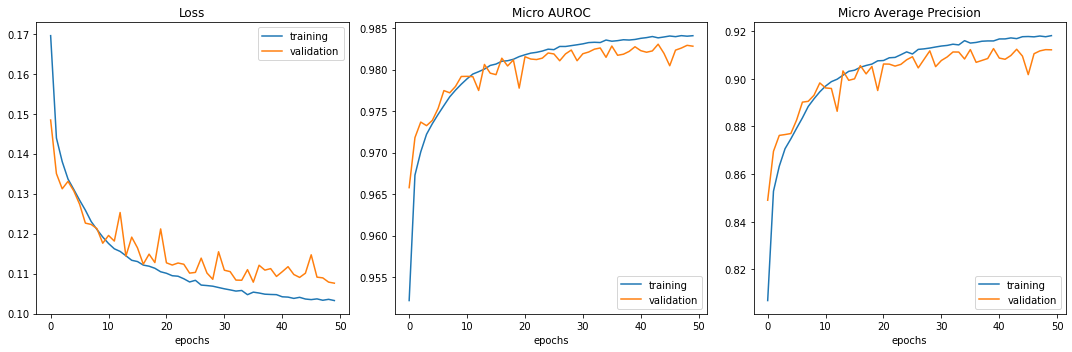

Plots of split2_2_history


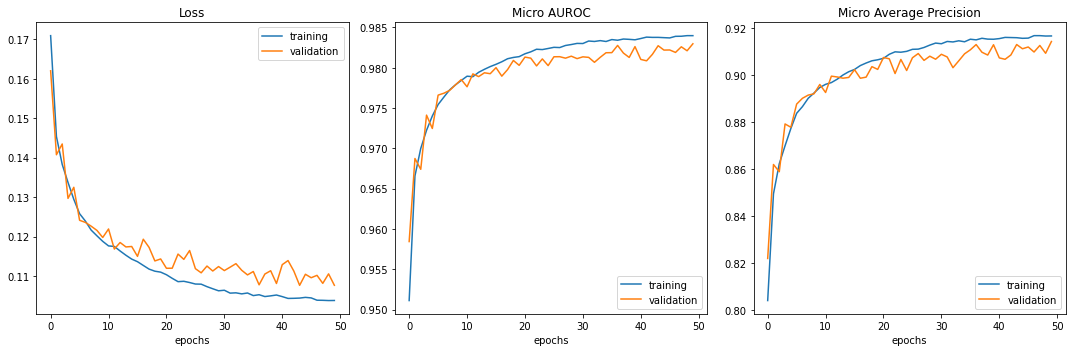

Plots of split2_3_history


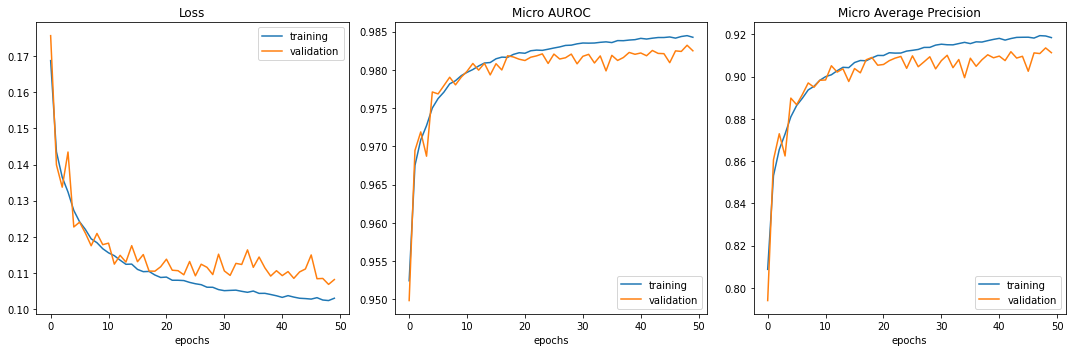

Plots of split3_1_history


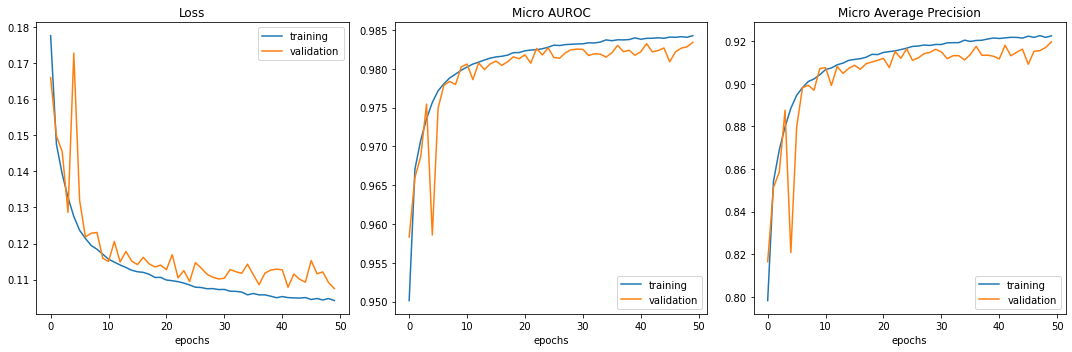

Plots of split4_0_history


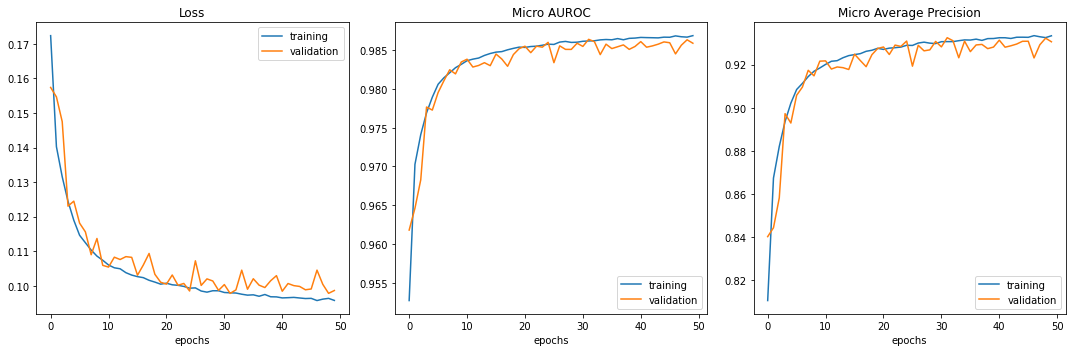

In [25]:
for path, history in train_histories:
    fig, axs = plt.subplots(1,3, figsize=(15, 5))

    print('Plots of {}'.format(os.path.basename(path).split('.')[0]))
    # train_loss & val_loss
    train_loss = history['train_loss']
    val_loss = history['val_loss']
    axs[0].plot(train_loss)
    axs[0].plot(val_loss)
    axs[0].set(title='Loss', xlabel = 'epochs')
    axs[0].legend(['training', 'validation'])

    # train_micro_auroc & val_micro_auroc
    train_loss = history['train_micro_auroc']
    val_loss = history['val_micro_auroc']
    axs[1].plot(train_loss)
    axs[1].plot(val_loss)
    axs[1].set(title='Micro AUROC', xlabel = 'epochs')
    axs[1].legend(['training', 'validation'],  loc = 'lower right')

    # train_micro_avg_auprc & val_micro_avg_auprc
    train_loss = history['train_micro_avg_auprc']
    val_loss = history['val_micro_avg_auprc']
    axs[2].plot(train_loss)
    axs[2].plot(val_loss)
    axs[2].set(title='Micro Average Precision', xlabel = 'epochs');
    axs[2].legend(['training', 'validation'], loc = 'lower right')

    fig.tight_layout()
    plt.show()

Trained model was saved only when the Micro AUROC of the validation phase was better than the previously computed. In the case of `split0`, the model was saved 10 times and with `split1` 7 times. In both cases, underfitting can be seen from training and validation loss.

To evaluate the development of the training, one might want to compare ROC Curves which were drawn in each validation phase of the training loop. So let's load two -- the really first one and the last one drawn.

ROC Curves in ../experiments/train_stratified/ROC_split0_0


'first'

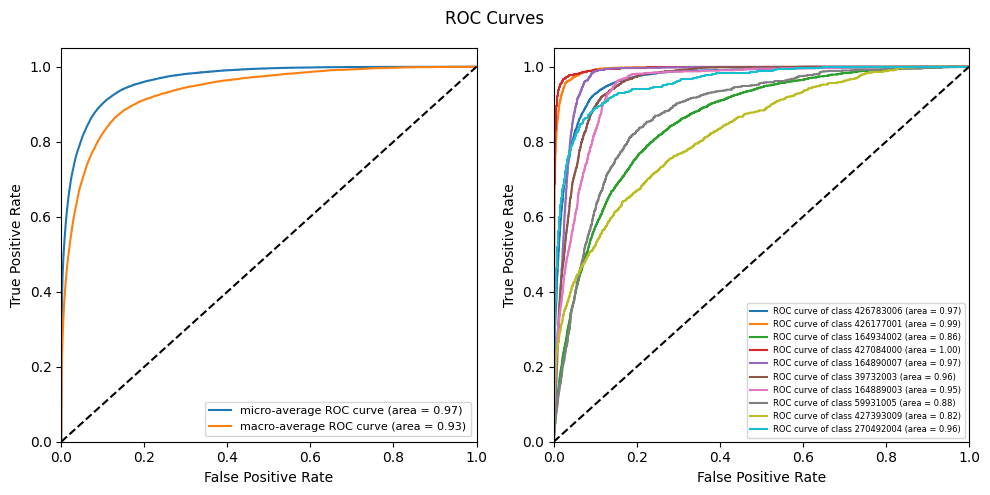

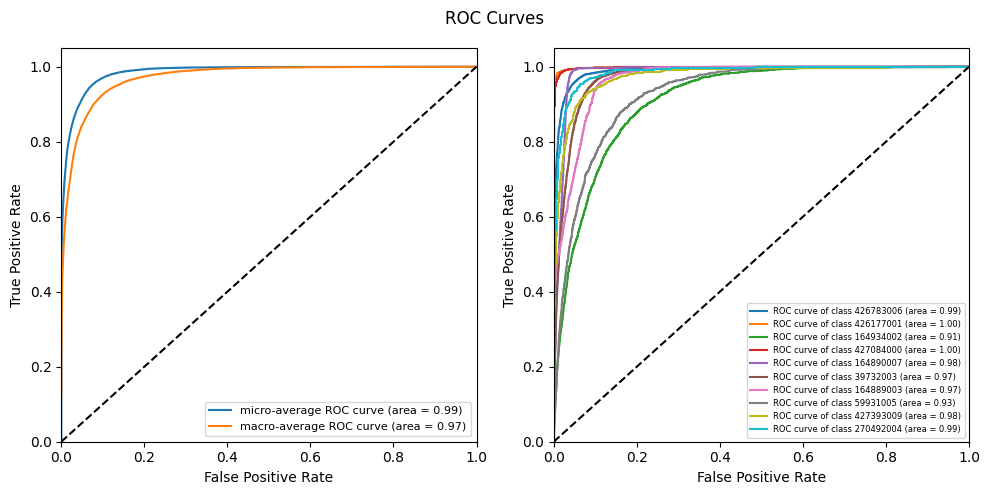

ROC Curves in ../experiments/train_stratified/ROC_split0_1


'first'

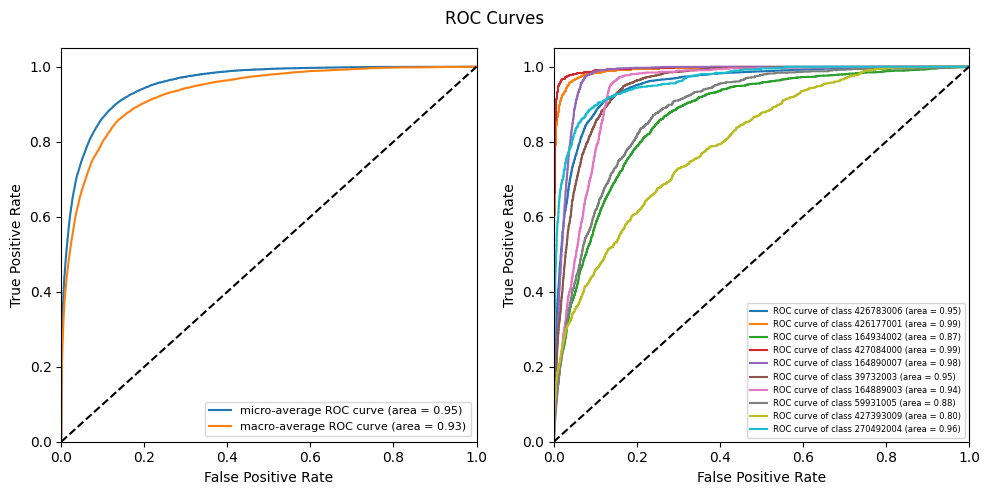

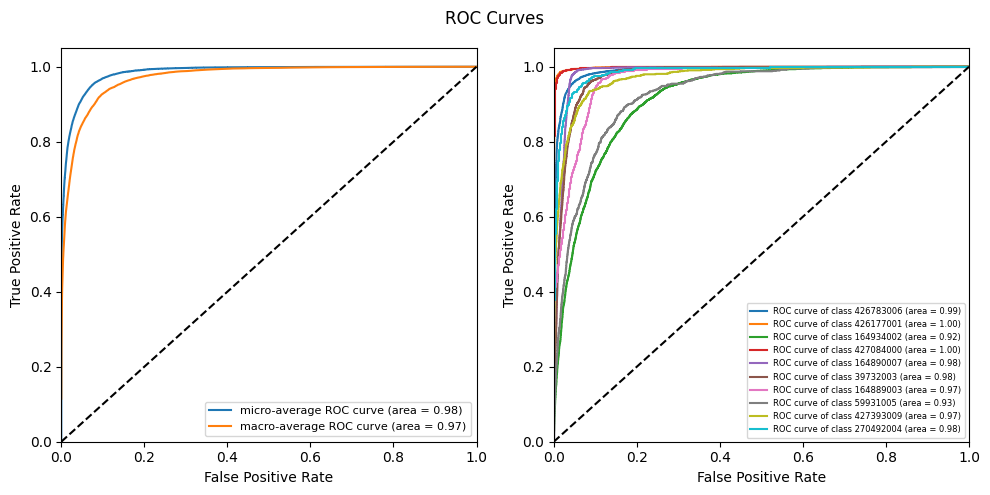

ROC Curves in ../experiments/train_stratified/ROC_split0_2


'first'

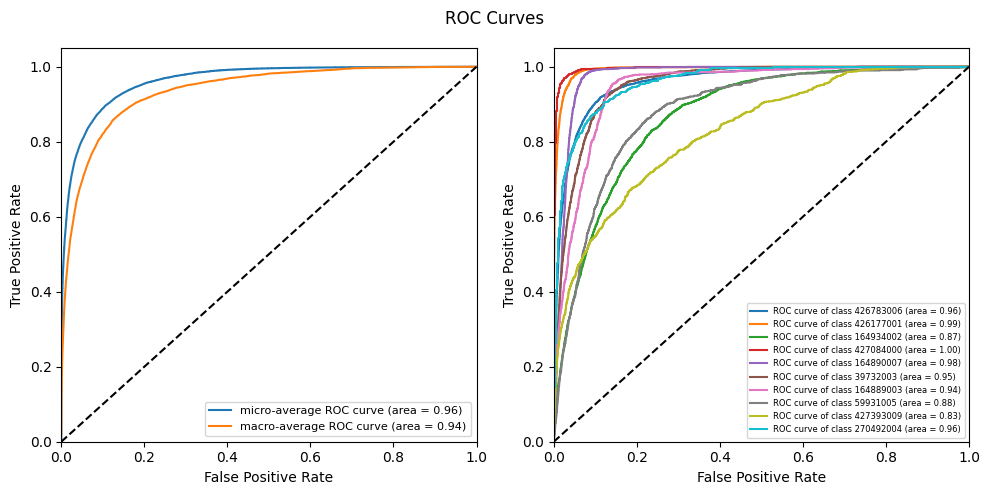

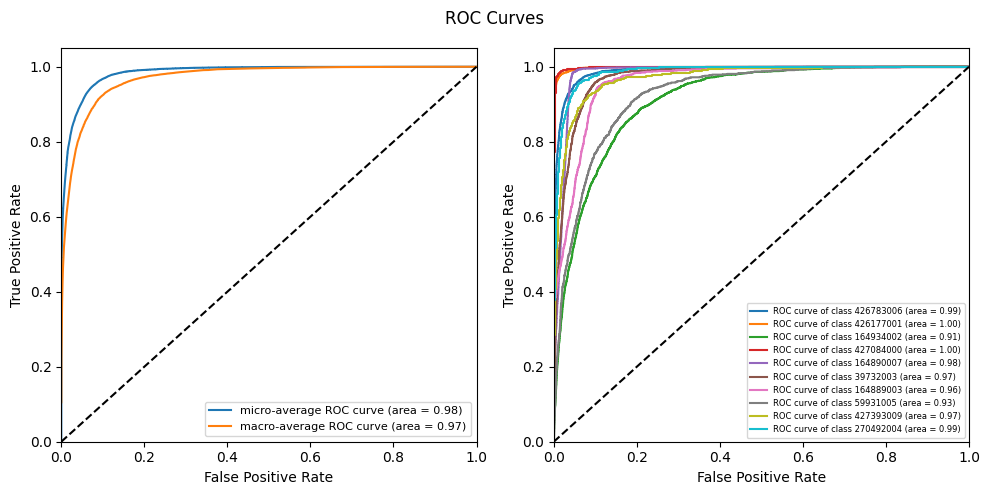

ROC Curves in ../experiments/train_stratified/ROC_split0_3


'first'

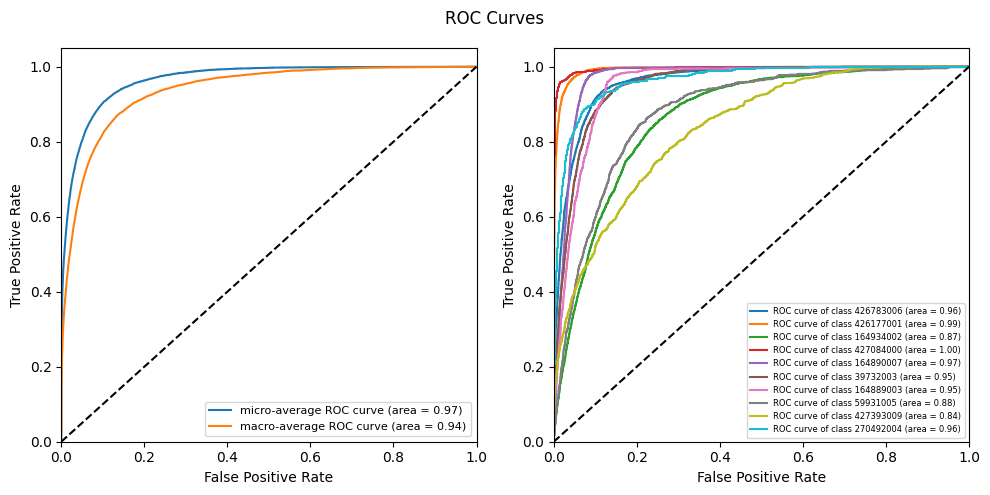

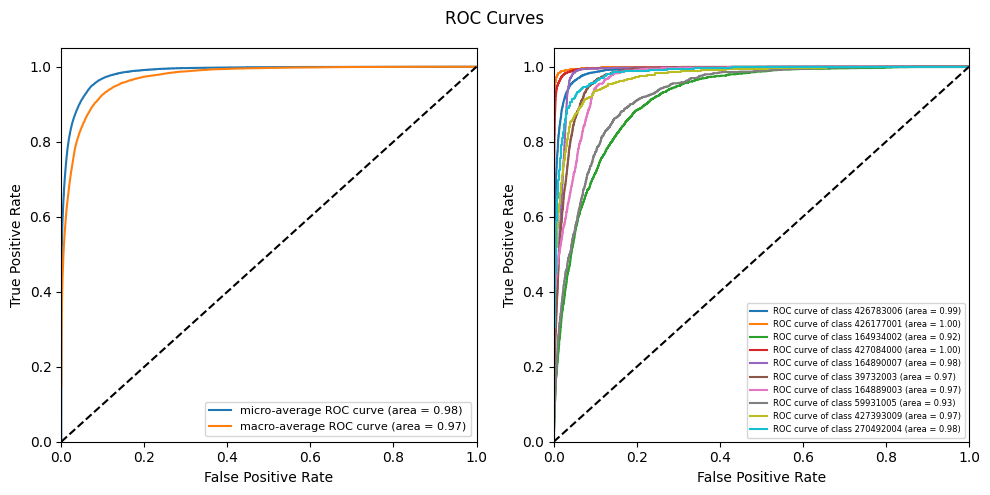

ROC Curves in ../experiments/train_stratified/ROC_split1_1


'first'

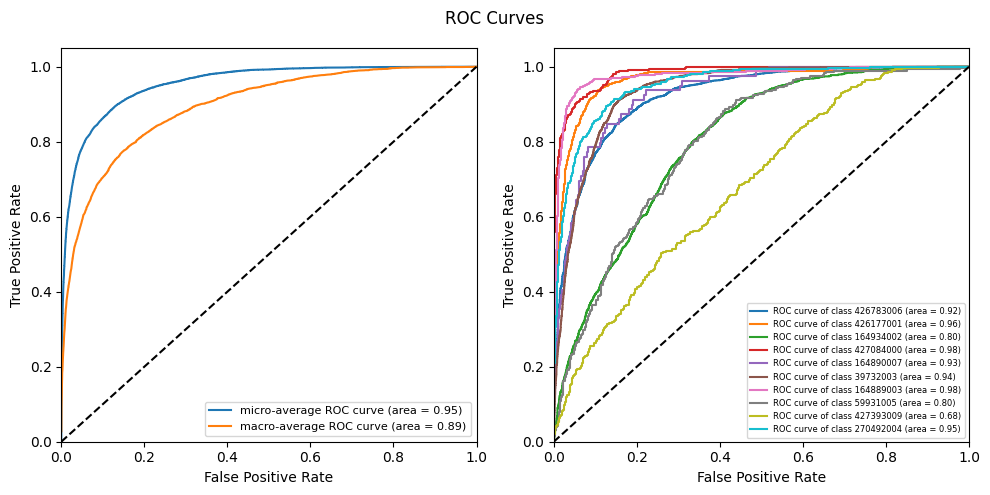

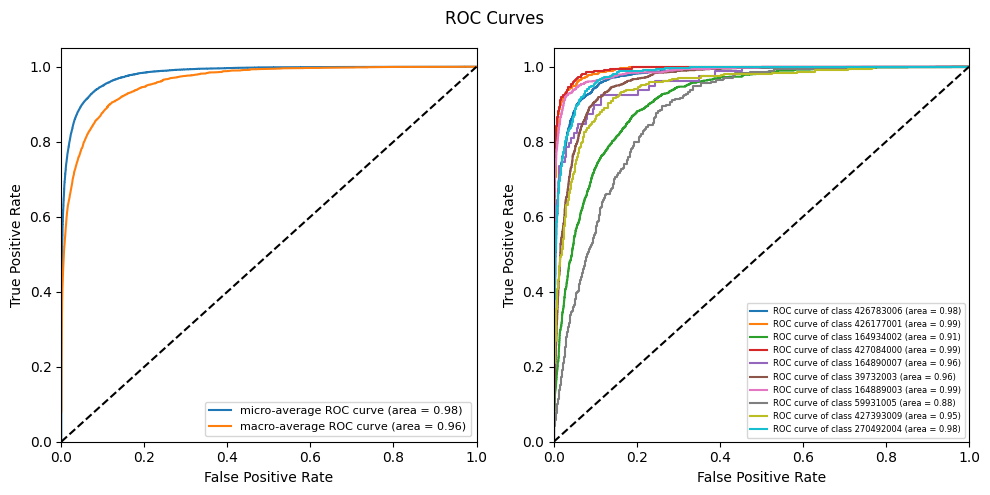

ROC Curves in ../experiments/train_stratified/ROC_split1_2


'first'

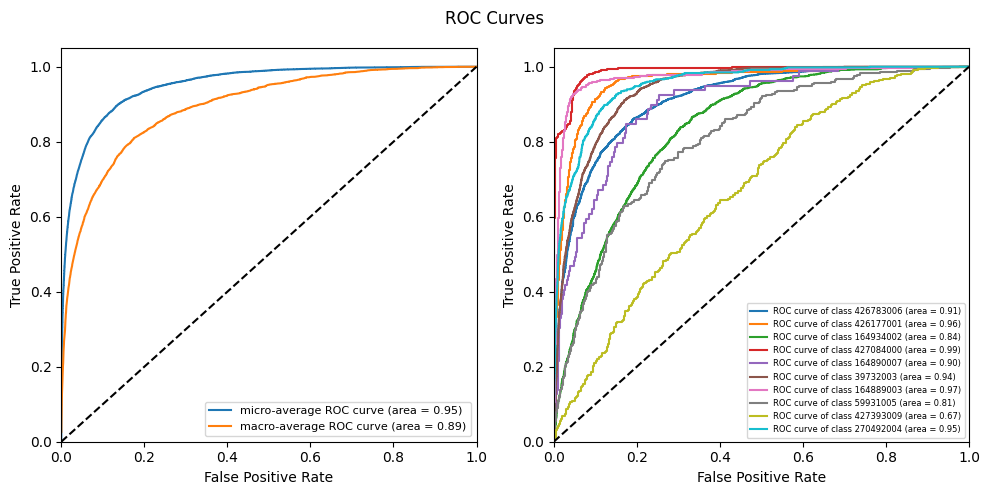

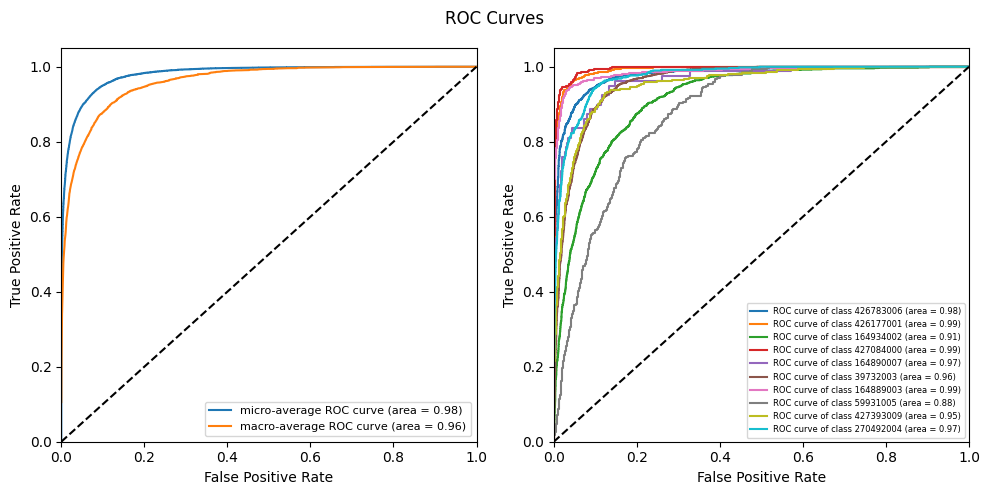

ROC Curves in ../experiments/train_stratified/ROC_split1_3


'first'

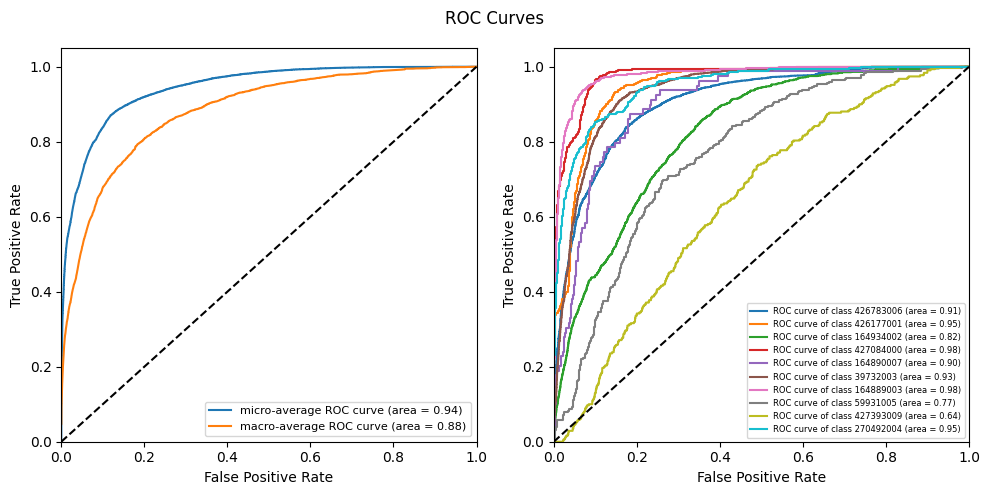

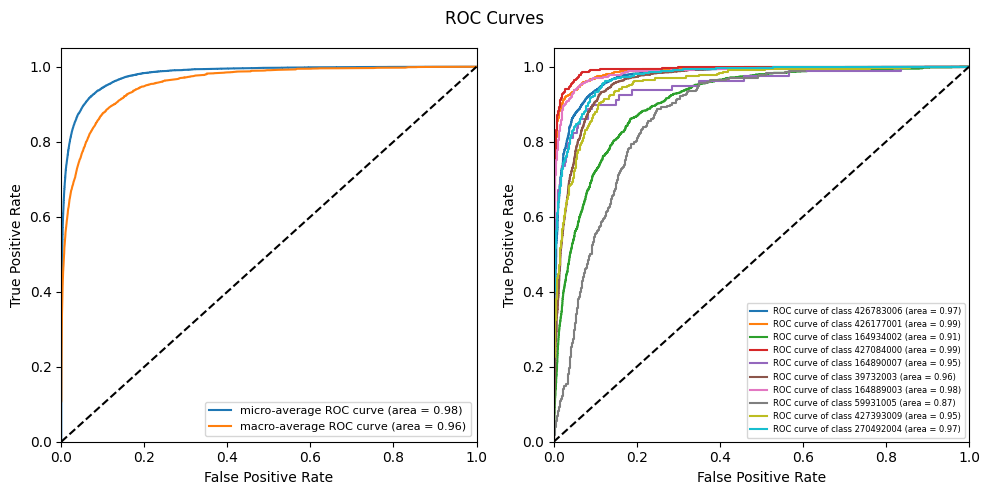

ROC Curves in ../experiments/train_stratified/ROC_split2_0


'first'

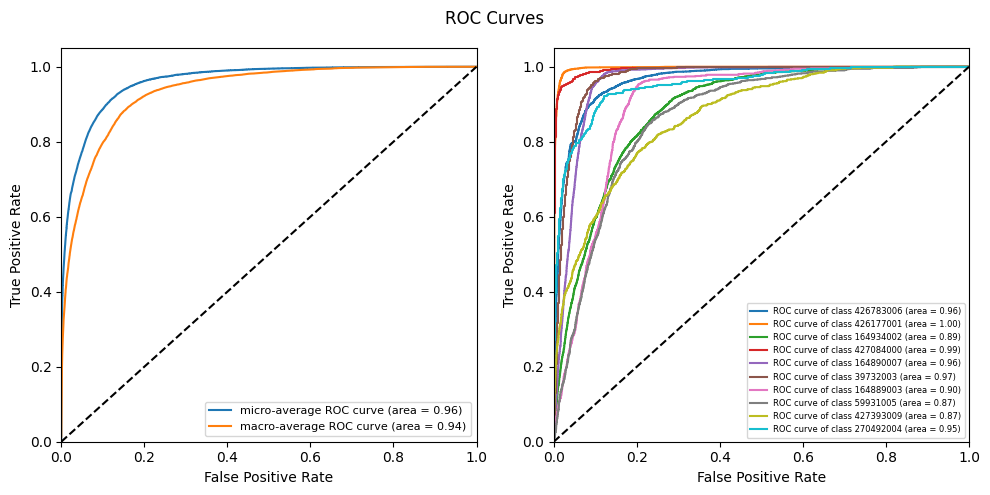

FileNotFoundError: No such file or directory: '../experiments/train_stratified/ROC_split2_0/roc-e50.png'

FileNotFoundError: No such file or directory: '../experiments/train_stratified/ROC_split2_0/roc-e50.png'

<IPython.core.display.Image object>

ROC Curves in ../experiments/train_stratified/ROC_split2_1


'first'

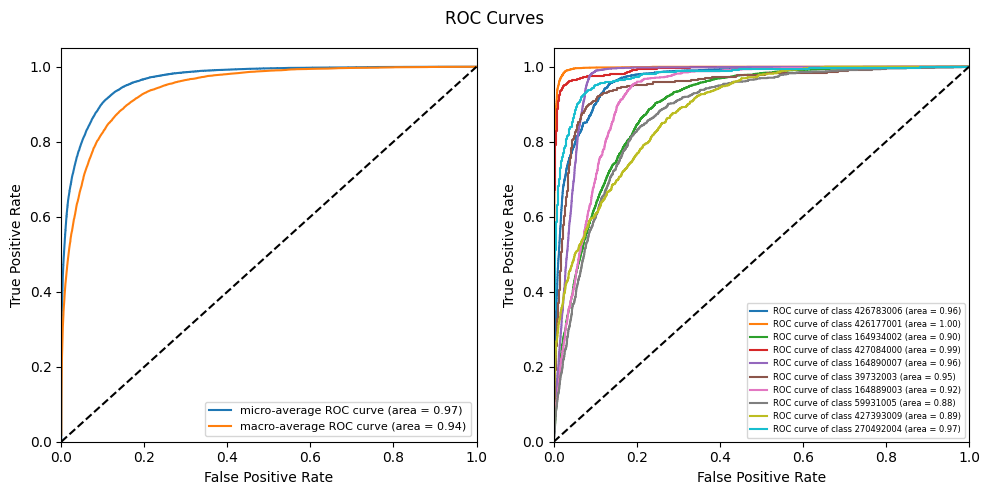

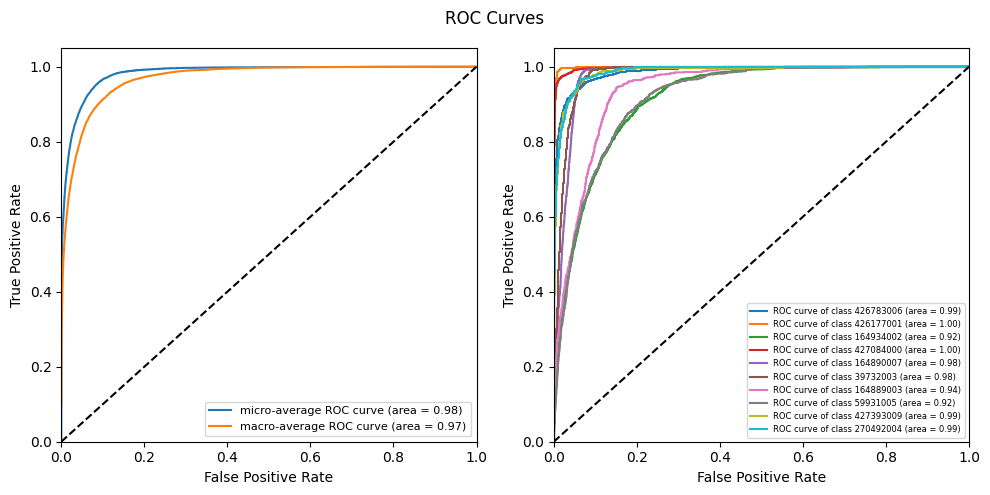

ROC Curves in ../experiments/train_stratified/ROC_split2_2


'first'

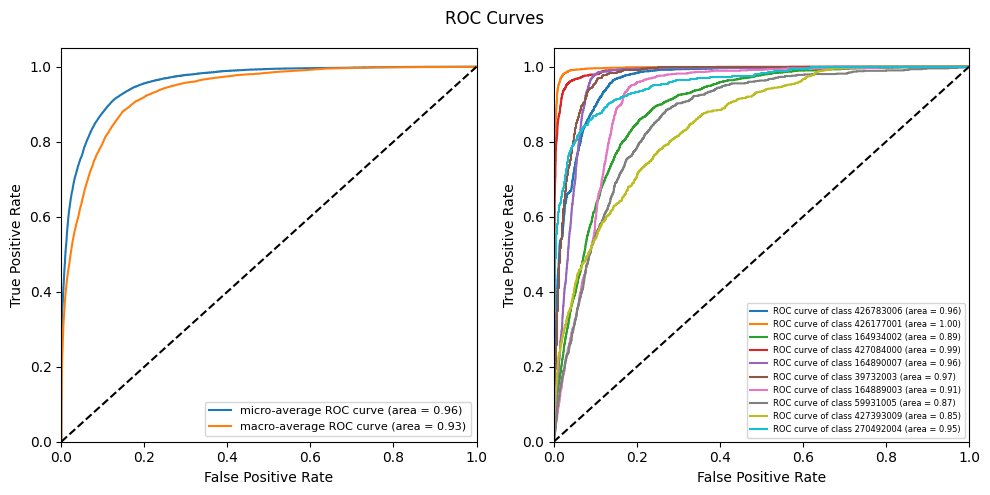

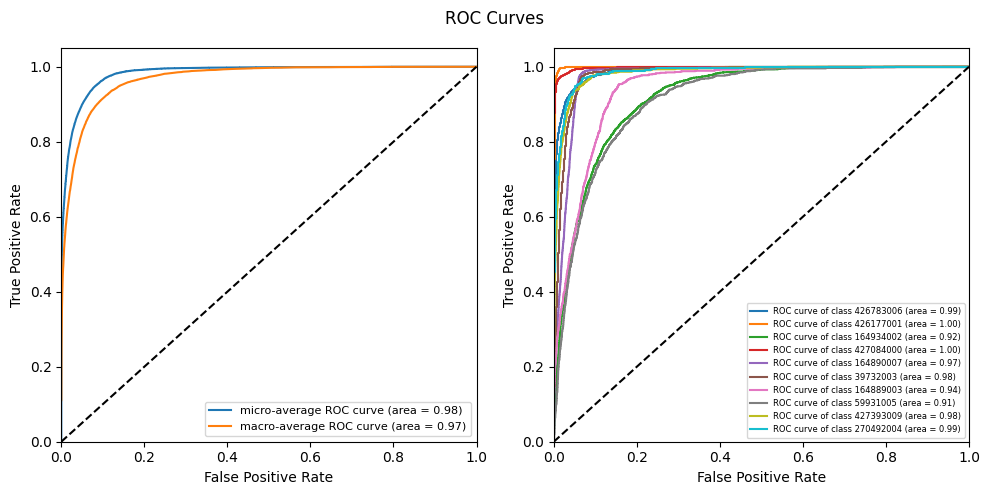

ROC Curves in ../experiments/train_stratified/ROC_split2_3


'first'

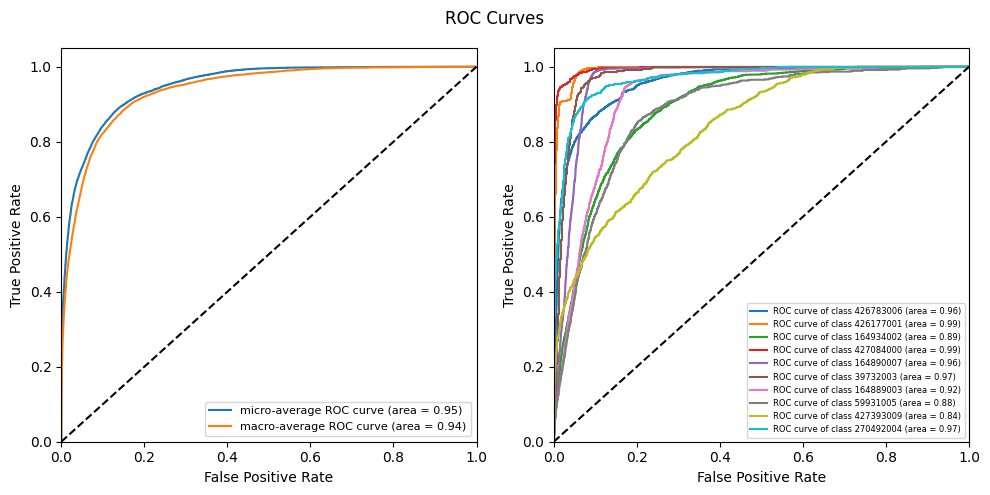

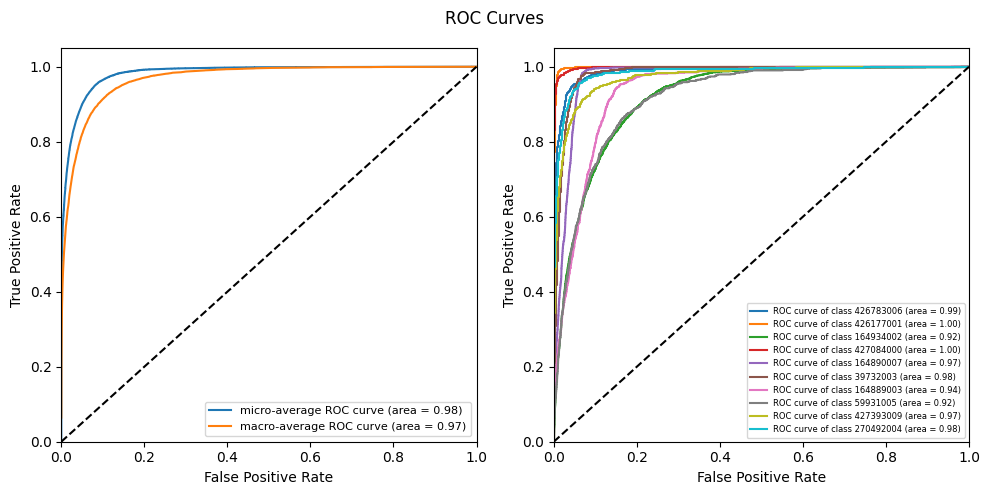

ROC Curves in ../experiments/train_stratified/ROC_split3_1


'first'

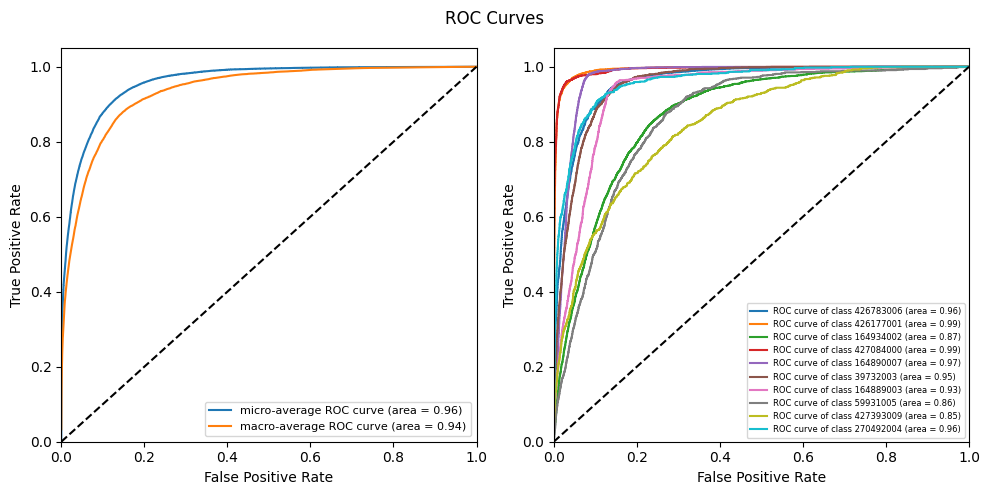

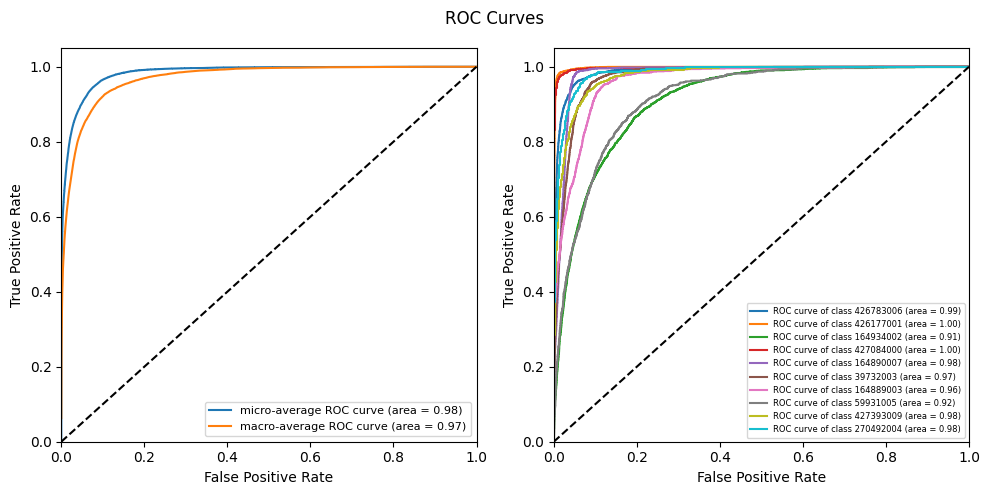

ROC Curves in ../experiments/train_stratified/ROC_split4_0


'first'

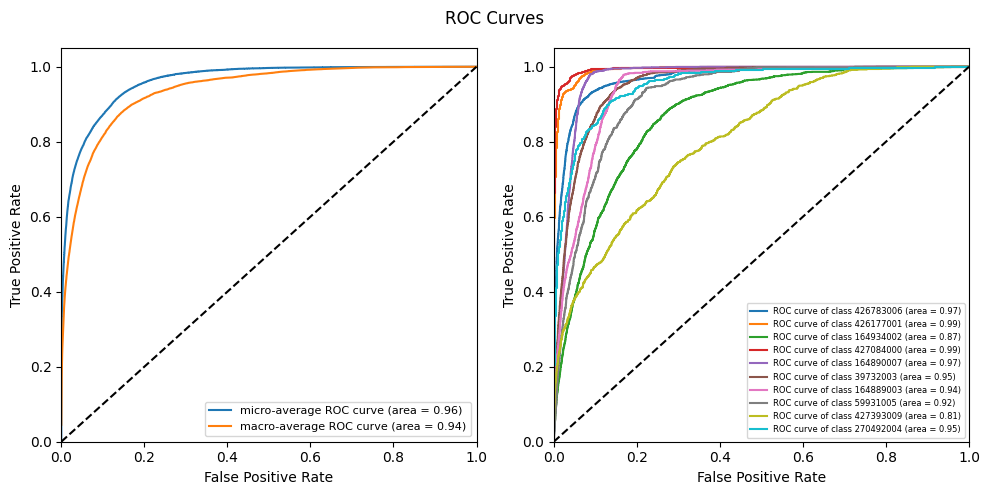

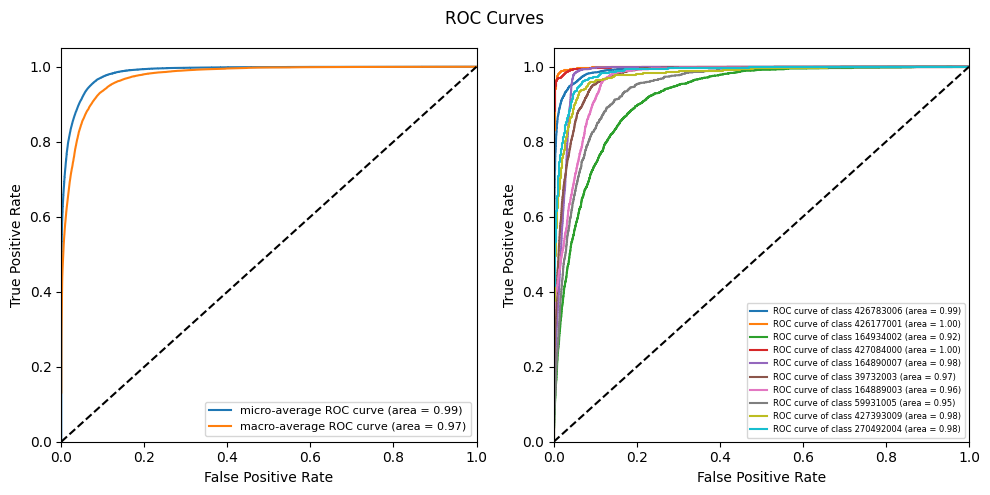

In [24]:
roc_path = os.path.join(exp_path, 'train_stratified')
roc_dirs = [os.path.join(roc_path, file) for file in os.listdir(roc_path) if not file.startswith('.') and os.path.isdir(os.path.join(roc_path, file))]
roc_dirs = sorted(roc_dirs)

for directory in roc_dirs:

    print('ROC Curves in {}'.format(directory))
    
    # first ROC Curve
    first_roc = os.path.join(directory, 'roc-e1.png')
    first_roc_image = Image(first_roc, width=800)

    # last ROC Curve
    last_roc = os.path.join(directory, 'roc-e50.png')
    last_roc_image = Image(last_roc, width=800)

    display(first_roc_image, last_roc_image)

Micro- and macro-average ROC Curves get a little better with `split0` (from 0.90/0.90 to 0.93/0.95). Micro-average ROC curve doesn't seem to get better with `split1`, only the macro-average one. Examining the labels individually, it seems that `split0` got better fitted than `split1`. `split1` couldn't predict diagnoses 164934002 (area 0.70) and 59931005 (area 0.68) that well but all the other AUROCs were over 0.90.

-----

# Prediction and Evaluation phase


In [27]:
# All histories are in the experiments directory
exp_path = '../experiments/'

# Get all evaluation history files in the experiments directory
# NB! Might have subdirectories
eval_history_files = []
for path, subdirs, files in os.walk(exp_path):
    for file in files:
        if file.endswith('.pickle') and 'eval' in file:
            eval_history_files.append(os.path.join(path, file))

print(*eval_history_files, sep='\n')

../experiments/prediction_DBwise/split2/eval_history.pickle
../experiments/prediction_DBwise/split11/eval_history.pickle
../experiments/prediction_DBwise/split18/eval_history.pickle


Since we focused the training histories of `split0` and `split1`, here the evaluation histories in `prediction_DBwise` are the correct ones.

In [28]:
# From where we want to load the evaluation history
wanted_eval_history_dirs = ['prediction_DBwise']
wanted_files = [file for file in eval_history_files if wanted_eval_history_dirs[0] in file or wanted_eval_history_dirs[1] in file]

# --------------------------------------------#

# Load history
eval_histories = []
for i in range(len(wanted_files)):
    with open(wanted_files[i], 'rb') as history_file:
        while True:
            try:
                eval_histories.append([history_file.name, pickle.load(history_file)])
            except EOFError:
                break
            
            
for path, history in eval_histories:
    print(path)
    for k, v in history.items():
        print('-', k+':', v)
    print()

../experiments/prediction_DBwise/split2/eval_history.pickle
- micro_avg_prec: 0.03480326040922727
- micro_auroc: 0.5425632895943141
- accuracy: 0.07050197405527354
- micro_f1: 0.10886153220063079

../experiments/prediction_DBwise/split11/eval_history.pickle
- micro_avg_prec: 0.05138491742464563
- micro_auroc: 0.5452319516564154
- accuracy: 0.06907975460122699
- micro_f1: 0.13491713403491082

../experiments/prediction_DBwise/split18/eval_history.pickle
- micro_avg_prec: 0.11796126594112485
- micro_auroc: 0.5905334533911921
- accuracy: 0.1437653042004144
- micro_f1: 0.2651263215367052



## Predicted Labels

In [60]:
all_eval_dirs = ['../' + re.search(r'(\w+.\w+.\w+.)', path).group(1) for path, _ in eval_histories]

pred_files = []
# Loading all the csv files of predictions
for d in all_eval_dirs:
    temp_list = []
    dir_name = os.path.basename(os.path.abspath(d))

    # All files
    for file in os.listdir(d):
        if file.endswith('.csv'):
            temp_list.append(file)
            
    pred_files.append([d, temp_list])

These should be the same length since both uses CPSC_CPSC-Extra database for predictions.

In [63]:
def get_binary_predictions(path, files):
    predictions = []
    for i, file in enumerate(files):
        file_path = os.path.join(path, file)
        with open(file_path, 'rb') as opened_file:
            all_lines = opened_file.readlines()
            
            # Get the predictions in bytes and convert to string
            bytes_to_str = all_lines[2].decode("utf-8")
           
            # For clearity, let's get rid of the commas
            cleaned_line = bytes_to_str.strip().replace(',', '')
            
            predictions.append(cleaned_line)
    
    return predictions

all_binary_labels = []
for path, files in pred_files:
    temp_binaries = get_binary_predictions(path, files)
    # All the binary labels should be at the same size
    assert len({len(label) for label in temp_binaries}) == 1,'Different length of predicted labels in csvs? Check the predictions!'
    all_binary_labels.append([path, temp_binaries])

In [64]:
for split, labels in all_binary_labels:
    
    print(split)
    
    # Check the number of different labels predicted
    set_binary_labels = set(labels)
    print('Total of {} different labels predicted'.format(len(set_binary_labels)))

    # Check if there are more than one predicted labels to be 1 (patient is predicted likely to have the diagnosis)
    multi_label = [label for label in labels if label.count('1') > 1]
    print('Total of {} labels have more than one predicted diagnosis'.format(len(multi_label)))

    # Check the range of predicted labels
    # Let's only find the maximum number of predicted labels
    # since obviously 1 is the minimum
    range_labels = []
    max_lab = 0
    for label in multi_label:
        label_count = label.count('1')
        if label_count > max_lab:
            max_lab = label_count
    print('Number of labels varies from 1 to {}'.format(max_lab))
    print()

../experiments/prediction_DBwise/split2/
Total of 69 different labels predicted
Total of 1181 labels have more than one predicted diagnosis
Number of labels varies from 1 to 4

../experiments/prediction_DBwise/split11/
Total of 93 different labels predicted
Total of 3114 labels have more than one predicted diagnosis
Number of labels varies from 1 to 5

../experiments/prediction_DBwise/split18/
Total of 83 different labels predicted
Total of 3826 labels have more than one predicted diagnosis
Number of labels varies from 1 to 5



In [65]:
most_commons = []
for split, labels in all_binary_labels:
    
    print(split)
    
    # Let's count 20 most common labels predicted
    # Blue cross is to visualize the multilabel predictions
    all_pred_counter = Counter(labels)

    most_common_keys = []
    most_common_labels = all_pred_counter.most_common(20)
    for key, value in most_common_labels:
        most_common_keys.append(key)
        print('-', key+':', value,end='')
        print('\033[94m' + ' x' + '\033[0m') if key.count('1') > 1 else print()
    
    most_commons.append([split, most_common_keys])
    print()

../experiments/prediction_DBwise/split2/
- 0000100000: 926
- 1000000000: 919
- 0010100000: 287 x
- 0001000000: 198
- 1000000001: 182 x
- 0000000001: 114
- 0100000001: 85 x
- 0100000000: 80
- 0011000000: 79 x
- 0010000000: 68
- 1010000000: 64 x
- 0000110000: 58 x
- 0010000001: 51 x
- 1000010000: 41 x
- 1010000001: 41 x
- 0000000010: 25
- 0000010001: 25 x
- 0000001000: 24
- 0001010000: 21 x
- 0110000000: 21 x

../experiments/prediction_DBwise/split11/
- 1000000000: 2314
- 0100000000: 994
- 0001000000: 765
- 0000100000: 477
- 1010000000: 404 x
- 1010000100: 311 x
- 0000000001: 303
- 0011000000: 263 x
- 1000000100: 222 x
- 0110000000: 185 x
- 0100000001: 167 x
- 0010100000: 163 x
- 1000000001: 144 x
- 1000010000: 133 x
- 0110000100: 126 x
- 0000000010: 101
- 0100010000: 70 x
- 0010000000: 54
- 0001000100: 53 x
- 0011000100: 52 x

../experiments/prediction_DBwise/split18/
- 1000000000: 9574
- 0100000000: 2583
- 0010000000: 1270
- 0000100000: 1093
- 0000000010: 1000
- 0001000000: 749
- 10100

Let's have the most common labels in pandas.DataFrame for visualization.

In [66]:
df_datas = []

for split, keys in most_commons:
    
    commas_common = [','.join(key) for key in keys]
    only_binary = [num for nums in keys for num in nums]

    df_data = []
    i_row = 0
    j_col = 10
    for i in range(len(keys)):
        df_data.append(only_binary[i_row:j_col])
        i_row += 10
        j_col += 10
        
    df_datas.append([split, df_data])

In [67]:
# Let's load the SNOMED CT Codes of diagnoses
# Can get them from the very first prediction csv file as they should be the same ones in all files
with open(os.path.join(split0_path, pred_files_split0[0]), 'r') as f:
    all_snomed_labels = f.readlines()[1].split()[0]

# Convert string to list
all_snomed_labels = list(all_snomed_labels.split(','))

for split, df in df_datas:
    
    print(split)
    # DataFrame
    df_tmp = pd.DataFrame(df, columns = all_snomed_labels) # , index = mc_range
    df_tmp = df_tmp.style.apply(lambda x: ["background: orange" if v == '1' else "" for v in x], axis = 1)
    display(df_tmp)
    print()

../experiments/prediction_DBwise/split2/



../experiments/prediction_DBwise/split11/



../experiments/prediction_DBwise/split18/


And finally, let's find out the label distribution.

../experiments/prediction_DBwise/split2/


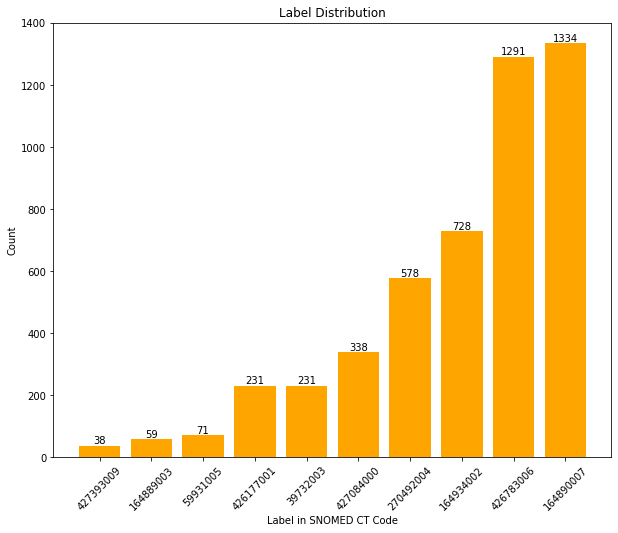

../experiments/prediction_DBwise/split11/


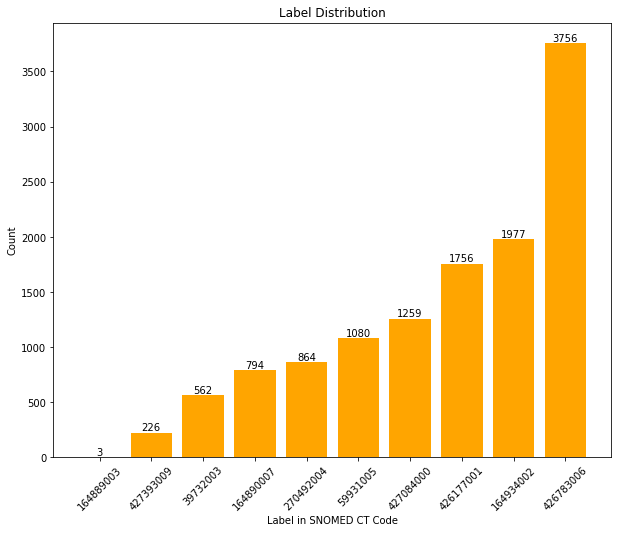

../experiments/prediction_DBwise/split18/


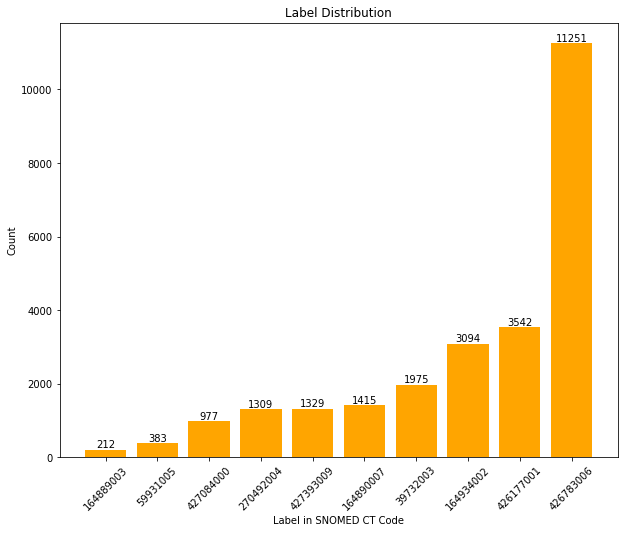

In [79]:
for split, labels in all_binary_labels:
    
    print(split)
    
    # We want to count each label individually how many times it's been predicted
    sum_class_1 = 0
    for binary in labels:
        if binary[0] == '1':
            sum_class_1 += 1

    count_dict = {
        '426783006': [binary[0] for binary in labels].count('1'),
        '426177001': [binary[1] for binary in labels].count('1'),
        '164934002': [binary[2] for binary in labels].count('1'),
        '427084000': [binary[3] for binary in labels].count('1'),
        '164890007': [binary[4] for binary in labels].count('1'),
        '39732003': [binary[5] for binary in labels].count('1'),
        '164889003': [binary[6] for binary in labels].count('1'),
        '59931005': [binary[7] for binary in labels].count('1'),
        '427393009': [binary[8] for binary in labels].count('1'),
        '270492004': [binary[9] for binary in labels].count('1')
    }

    count_dict = dict(sorted(count_dict.items(), key=lambda x: x[1]))

    # Plot
    f, ax = plt.subplots()
    f.set_figwidth(10)
    f.set_figheight(8)
    plt.bar(count_dict.keys(), count_dict.values(), color='orange')

    plt.title('Label Distribution')
    plt.xlabel('Label in SNOMED CT Code')
    plt.ylabel('Count')
    plt.xticks(rotation = 45)
    
    x_labels = list(count_dict.keys())
    y_Labels = list(count_dict.values())
    for i in range(len(x_labels)):
        plt.annotate(str(y_Labels[i]), xy=(x_labels[i],y_Labels[i]), ha='center', va='bottom')

    plt.show()